In [57]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier


In [59]:
data=pd.read_csv("Social_Network_Ads (1).csv")
print(data.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [61]:
data=pd.get_dummies(data,columns=['Gender'],drop_first=True,dtype=int)

In [63]:
print(data_encode.head())

    User ID  Age  EstimatedSalary  Purchased  Gender_Male
0  15624510   19            19000          0            1
1  15810944   35            20000          0            1
2  15668575   26            43000          0            0
3  15603246   27            57000          0            0
4  15804002   19            76000          0            1


In [65]:
print(data['Purchased'].value_counts())

Purchased
0    257
1    143
Name: count, dtype: int64


In [67]:
print(data.isnull().sum())

User ID            0
Age                0
EstimatedSalary    0
Purchased          0
Gender_Male        0
dtype: int64


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
 4   Gender_Male      400 non-null    int32
dtypes: int32(1), int64(4)
memory usage: 14.2 KB


In [73]:
int_data=data.drop(columns=["Gender_Male","Purchased"])

In [75]:
data.columns

Index(['User ID', 'Age', 'EstimatedSalary', 'Purchased', 'Gender_Male'], dtype='object')

In [77]:
print(data.head())

    User ID  Age  EstimatedSalary  Purchased  Gender_Male
0  15624510   19            19000          0            1
1  15810944   35            20000          0            1
2  15668575   26            43000          0            0
3  15603246   27            57000          0            0
4  15804002   19            76000          0            1


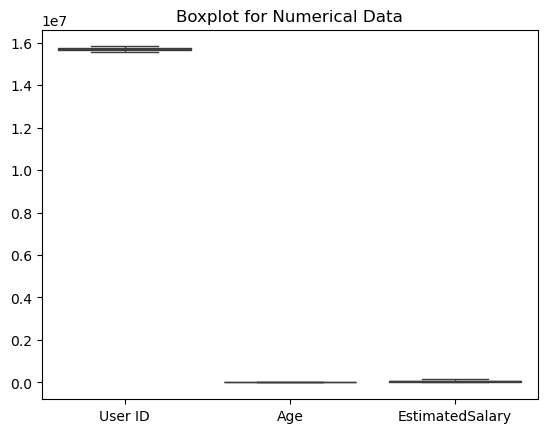

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplot for each numerical column to visually inspect outliers
sns.boxplot(data=int_data)
plt.title('Boxplot for Numerical Data')
plt.show()


In [85]:
# Get the count of non-null values in each column
column_counts = int_data.count()

# Print the count for each column
print(column_counts)


User ID            400
Age                400
EstimatedSalary    400
dtype: int64


In [93]:
from imblearn.combine import SMOTETomek
X = data.drop(columns=['Purchased'])
y = data['Purchased'] 
smote_tomek=SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)
print("Original dataset shape:", y.value_counts())
print("After SMOTETomek:", y_resampled.value_counts())


Original dataset shape: Purchased
0    257
1    143
Name: count, dtype: int64
After SMOTETomek: Purchased
0    219
1    219
Name: count, dtype: int64


In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training class distribution:", y_train.value_counts())
print("Testing class distribution:", y_test.value_counts())

Training set shape: (350, 4)
Testing set shape: (88, 4)
Training class distribution: Purchased
1    175
0    175
Name: count, dtype: int64
Testing class distribution: Purchased
1    44
0    44
Name: count, dtype: int64


In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[37  7]
 [ 9 35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82        44
           1       0.83      0.80      0.81        44

    accuracy                           0.82        88
   macro avg       0.82      0.82      0.82        88
weighted avg       0.82      0.82      0.82        88

Accuracy Score: 0.8181818181818182
